# Customer Segmenttation Project

### Yashank Rajvanshi
#### +91-7597067408
#### 21it3030@rgipt.ac.in

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
train=pd.read_csv("Train.csv")
test=pd.read_csv("Test.csv")

In [3]:
data=pd.concat([train,test])

In [4]:
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10695 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     10695 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1002.7+ KB


In [6]:
data.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [7]:
data=data.rename(columns={"Var_1":"Category"})

In [8]:
data=data.drop(columns="ID")

In [9]:
data["Age"].unique()

array([22, 38, 67, 40, 56, 32, 33, 61, 55, 26, 19, 70, 58, 41, 31, 79, 49,
       18, 36, 35, 45, 42, 83, 27, 28, 47, 29, 57, 76, 25, 72, 48, 74, 59,
       39, 51, 30, 63, 52, 60, 68, 86, 50, 43, 80, 37, 46, 69, 78, 71, 82,
       23, 20, 85, 21, 53, 62, 75, 65, 89, 66, 73, 77, 87, 84, 81, 88],
      dtype=int64)

In [10]:
data.duplicated().sum()

629

Duplicate Professions: ['Engineer' 'Healthcare' 'Artist' 'Lawyer' 'Entertainment' 'Homemaker'
 'Executive' 'Doctor' 'Marketing' nan]


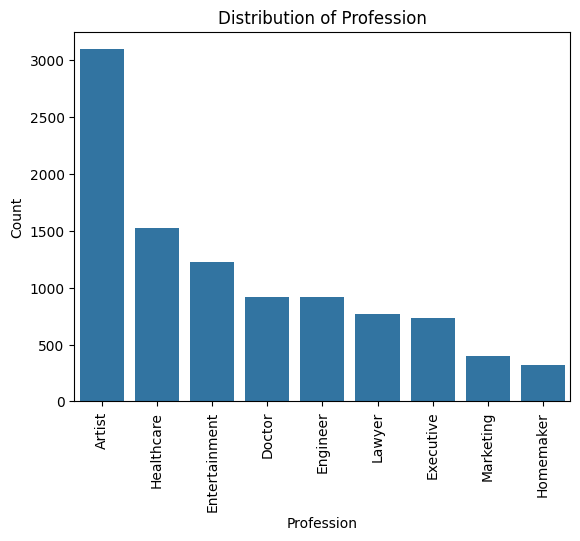

In [13]:
# Remove duplicate rows
data = data.drop_duplicates()

# Check for duplicate 'Profession' labels
duplicate_professions = data['Profession'][data['Profession'].duplicated()].unique()
print("Duplicate Professions:", duplicate_professions)

# Alternatively, if you want to handle duplicates by aggregating:
# Create a count of each profession
profession_counts = data['Profession'].value_counts().reset_index()
profession_counts.columns = ['Profession', 'Count']

# Plotting
sns.barplot(x='Profession', y='Count', data=profession_counts)
plt.title("Distribution of Profession")
plt.xticks(rotation=90)  # Rotate x labels for better readability if there are many professions
plt.show()

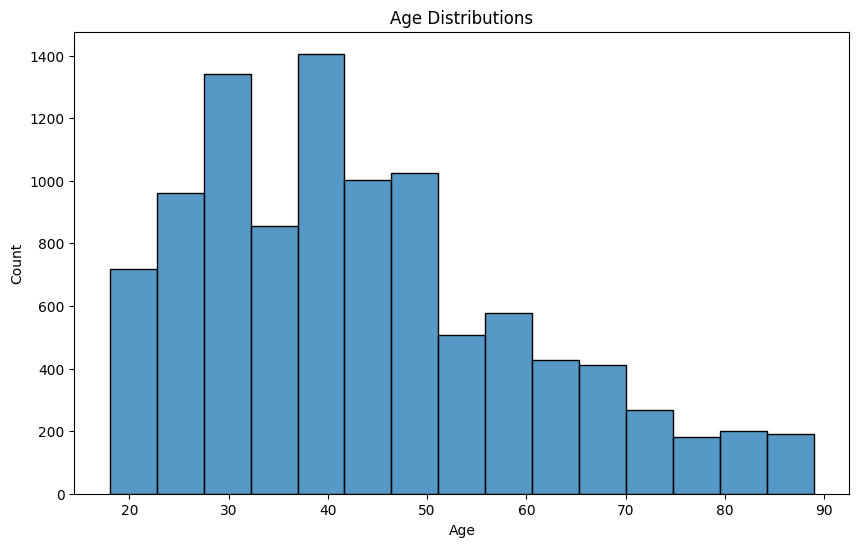

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(x='Age',data=data,bins=15)
plt.title("Age Distributions")
plt.show()

In [15]:
data.isnull().sum()

Gender                0
Ever_Married        189
Age                   0
Graduated           100
Profession          162
Work_Experience    1053
Spending_Score        0
Family_Size         443
Category            108
Segmentation          0
dtype: int64

In [16]:
data["Ever_Married"].fillna(data["Ever_Married"].mode()[0],inplace=True)

In [17]:
data["Graduated"].fillna(data["Graduated"].mode()[0],inplace=True)

In [18]:
data["Profession"].fillna(data["Profession"].mode()[0],inplace=True)

In [19]:
data["Work_Experience"].fillna(data["Work_Experience"].mode()[0],inplace=True)

In [20]:
data["Family_Size"].fillna(data["Family_Size"].mode()[0],inplace=True)

In [21]:
data["Category"].fillna(data["Category"].mode()[0],inplace=True)

In [22]:
data.isnull().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Category           0
Segmentation       0
dtype: int64

<Axes: xlabel='Age'>

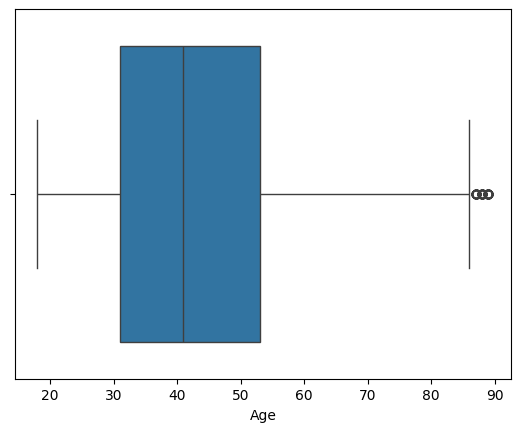

In [23]:
sns.boxplot(x=data["Age"])

In [24]:
# calculating Q1
q1=data["Age"].quantile(0.25)
print("q1:",q1)
# calculating q3
q3=data["Age"].quantile(0.75)
print("q3:",q3)
# calculating IQR
IQR=q3-q1
print("IQR:",IQR)
#calculating lowerlimit
ll=q1-(IQR*1.5)
print("ll:",ll)
# calculating upper limit
ul=q3+(IQR*1.5)
print("ul:",ul)

q1: 31.0
q3: 53.0
IQR: 22.0
ll: -2.0
ul: 86.0


In [25]:
data[(data["Age"]<ll) | (data["Age"]>ul)]

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category,Segmentation
321,Male,Yes,89,Yes,Lawyer,13.0,Low,1.0,Cat_6,A
395,Female,Yes,89,No,Lawyer,3.0,High,1.0,Cat_6,D
460,Female,Yes,87,Yes,Lawyer,0.0,High,2.0,Cat_6,C
656,Male,Yes,87,No,Executive,1.0,Low,2.0,Cat_6,A
699,Male,Yes,88,No,Executive,0.0,Low,1.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...
2394,Male,Yes,88,Yes,Artist,1.0,Low,2.0,Cat_6,C
2437,Male,Yes,89,Yes,Lawyer,0.0,Low,2.0,Cat_6,D
2498,Male,Yes,89,Yes,Lawyer,4.0,Low,1.0,Cat_6,A
2548,Male,Yes,89,Yes,Lawyer,7.0,High,2.0,Cat_6,C


In [26]:
data["Gender"].value_counts()

Gender
Male      5458
Female    4608
Name: count, dtype: int64

In [27]:
data["Ever_Married"].value_counts()

Ever_Married
Yes    6032
No     4034
Name: count, dtype: int64

In [28]:
data["Graduated"].value_counts()

Graduated
Yes    6307
No     3759
Name: count, dtype: int64

In [29]:
data["Age"].describe()

count    10066.000000
mean        43.599146
std         16.535715
min         18.000000
25%         31.000000
50%         41.000000
75%         53.000000
max         89.000000
Name: Age, dtype: float64

In [30]:
data["Profession"].value_counts()

Profession
Artist           3255
Healthcare       1528
Entertainment    1223
Doctor            916
Engineer          915
Lawyer            772
Executive         737
Marketing         399
Homemaker         321
Name: count, dtype: int64

In [31]:
data["Work_Experience"].value_counts()

Work_Experience
1.0     3902
0.0     2845
8.0      600
9.0      592
2.0      368
4.0      336
3.0      332
5.0      266
6.0      263
7.0      252
14.0      66
10.0      64
11.0      63
12.0      60
13.0      57
Name: count, dtype: int64

In [32]:
data["Spending_Score"].value_counts()

Spending_Score
Low        6118
Average    2448
High       1500
Name: count, dtype: int64

In [33]:
data["Family_Size"].value_counts()

Family_Size
2.0    3417
1.0    1865
3.0    1819
4.0    1654
5.0     779
6.0     285
7.0     122
8.0      65
9.0      60
Name: count, dtype: int64

In [34]:
data["Category"].value_counts()

Category
Cat_6    6469
Cat_4    1438
Cat_3    1064
Cat_2     551
Cat_7     266
Cat_1     165
Cat_5     113
Name: count, dtype: int64

In [35]:
data["Segmentation"].value_counts()

Segmentation
D    2775
A    2720
B    2332
C    2239
Name: count, dtype: int64

In [36]:
data["Gender"].replace({"Male":[1],"Female":[0]},inplace=True)

In [37]:
data["Ever_Married"].replace({"No":0,"Yes":1},inplace=True)

In [38]:
data["Graduated"].replace({"No":0,"Yes":1},inplace=True)

In [39]:
data["Profession"].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing'], dtype=object)

In [40]:
data["Profession"].replace({"Healthcare":0,"Engineer":1,'Lawyer':2, 'Entertainment':3, 'Artist':4,
       'Executive':5, 'Doctor':6, 'Homemaker':7, 'Marketing':8},inplace=True)

In [41]:
data["Spending_Score"].unique()

array(['Low', 'Average', 'High'], dtype=object)

In [42]:
data["Spending_Score"].replace({"Low":0,"Average":1,"High":2},inplace=True)

In [43]:
data["Category"].unique()

array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', 'Cat_5'],
      dtype=object)

In [44]:
data["Category"].replace({'Cat_4':3, 'Cat_6':5, 'Cat_7':6, 'Cat_3':2, 'Cat_1':0, 'Cat_2':1, 'Cat_5':4},inplace=True)

In [45]:
data["Segmentation"].unique()

array(['D', 'A', 'B', 'C'], dtype=object)

In [46]:
data["Segmentation"].replace({"A":0,"B":1,"C":2,"D":3},inplace=True)

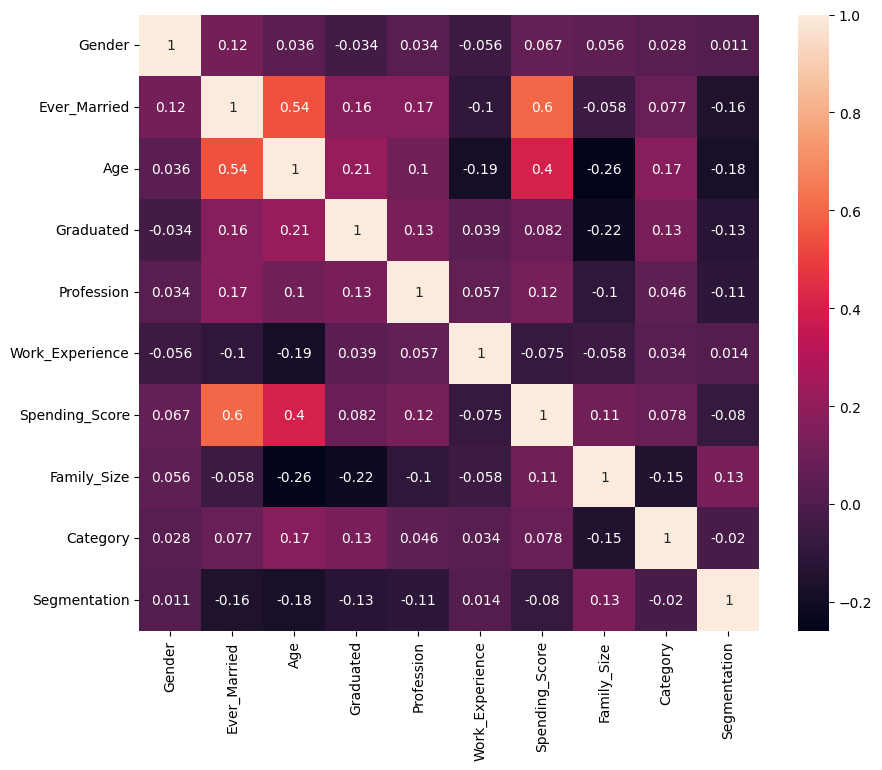

In [47]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [48]:
data.dropna(inplace=True)

In [49]:
x=data[['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Category']]
y=data["Segmentation"]

In [50]:
x

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category
0,1,0,22,0,0,1.0,0,4.0,3
1,0,1,38,1,1,1.0,1,3.0,3
2,0,1,67,1,1,1.0,0,1.0,5
3,1,1,67,1,2,0.0,2,2.0,5
4,0,1,40,1,3,1.0,2,6.0,5
...,...,...,...,...,...,...,...,...,...
2621,0,0,35,1,3,1.0,0,2.0,5
2622,1,0,29,0,0,9.0,0,4.0,5
2623,0,0,35,1,6,1.0,0,1.0,5
2624,0,0,53,1,3,1.0,0,2.0,5


In [51]:
y

0       3
1       0
2       1
3       1
4       0
       ..
2621    3
2622    1
2623    0
2624    2
2626    0
Name: Segmentation, Length: 10066, dtype: int64

In [52]:
from sklearn.linear_model import LogisticRegression
train=[]
test=[]
cv=[]
for i in range(1,50):
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    l=LogisticRegression()
    l.fit(x_train,y_train)
    ŷ_train=l.predict(x_train)
    ŷ_test=l.predict(x_test)
    from sklearn.metrics import accuracy_score
    train.append(accuracy_score(y_train,ŷ_train))
    test.append(accuracy_score(y_test,ŷ_test))
    from sklearn.model_selection import cross_val_score
    cv.append(cross_val_score(l,x_train,y_train,cv=5,scoring="accuracy").mean())
df1=pd.DataFrame({"train":train,"test":test,"cv":cv})
df2=df1[(abs(df1["train"]-df1["test"])<=0.05) & (abs(df1["test"]-df1["cv"])<=0.05)]
df3=df2[df2["cv"]==df2["cv"].max()].index.to_list()[0]
print("best random state",df3)

best random state 2


In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Logistic Regression

In [54]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [55]:
lr=LogisticRegression()
lr.fit(x,y)
ŷ_train=lr.predict(x_train)
ŷ_test=lr.predict(x_test)
print("test_accuracy",accuracy_score(y_train,ŷ_train))
print("test_accuracy",accuracy_score(y_test,ŷ_test))
print("cross_validation",cross_val_score(lr,x_train,y_train,cv=5).mean())

test_accuracy 0.36649279682066566
test_accuracy 0.37388282025819264
cross_validation 0.40164043011747647


In [56]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test,ŷ_test)
cm

array([[ 39,  68,  61, 373],
       [ 27, 107, 103, 239],
       [ 16, 106, 138, 161],
       [ 22,  48,  37, 469]], dtype=int64)

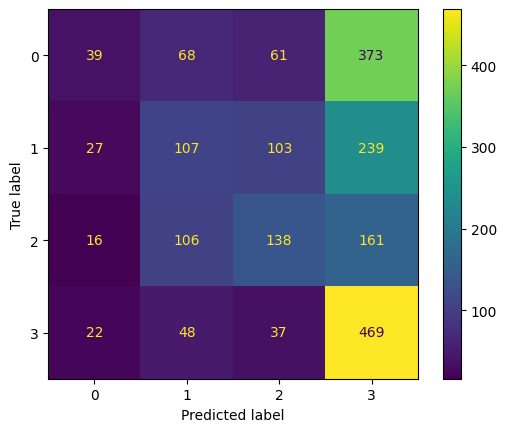

In [57]:
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ŷ_test))

              precision    recall  f1-score   support

           0       0.38      0.07      0.12       541
           1       0.33      0.22      0.27       476
           2       0.41      0.33      0.36       421
           3       0.38      0.81      0.52       576

    accuracy                           0.37      2014
   macro avg       0.37      0.36      0.32      2014
weighted avg       0.37      0.37      0.32      2014



### KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier
estimator=KNeighborsClassifier()
param_grid={"n_neighbors":list(range(1,50))}
from sklearn.model_selection import GridSearchCV
cv_classifier=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
cv_classifier.fit(x_train,y_train)
cv_classifier.best_params_

{'n_neighbors': 48}

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=39)
knn.fit(x_train,y_train)

# assigning y predict predict
ŷ_train=knn.predict(x_train)
ŷ_test=knn.predict(x_test)

# accuracy
from sklearn.metrics import accuracy_score
print("train_accuracy",accuracy_score(y_train,ŷ_train))
print("test_accuracy",accuracy_score(y_test,ŷ_test))

from sklearn.model_selection import cross_val_score
print("cross_validation",cross_val_score(knn,x,y,cv=5).mean())

train_accuracy 0.4704421261798311
test_accuracy 0.42502482621648463
cross_validation 0.4130704541631333


In [61]:
cm=confusion_matrix(y_test,ŷ_test)
cm


array([[217, 123,  87, 114],
       [161, 120, 140,  55],
       [ 79,  85, 192,  65],
       [148,  52,  49, 327]], dtype=int64)

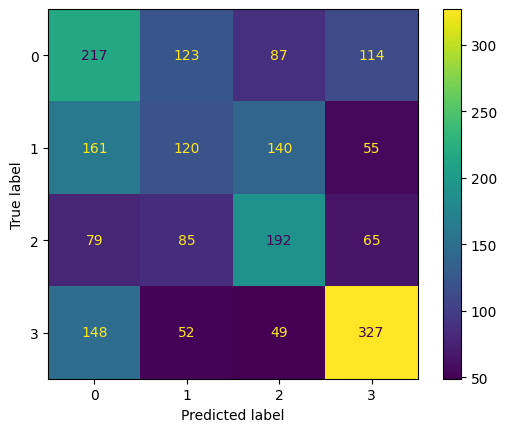

In [62]:
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ŷ_test))

              precision    recall  f1-score   support

           0       0.36      0.40      0.38       541
           1       0.32      0.25      0.28       476
           2       0.41      0.46      0.43       421
           3       0.58      0.57      0.58       576

    accuracy                           0.43      2014
   macro avg       0.42      0.42      0.42      2014
weighted avg       0.42      0.43      0.42      2014



### SVM

In [64]:
from sklearn.svm import SVC
estimator=SVC()
param_grid={"C":[1,3,5,7,9],"kernel":["linear","polynomial","rbf","sigmoid"]}
model1=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
model1.fit(x_train,y_train)
model1.best_params_

{'C': 1, 'kernel': 'rbf'}

In [65]:
svm=SVC(C=3,kernel="rbf")
svm.fit(x_train,y_train)

ŷ_train=svm.predict(x_train)
ŷ_test=svm.predict(x_test)
print("train accuracy",accuracy_score(y_train,ŷ_train))
print("test accuracy",accuracy_score(y_test,ŷ_test))
print("CV",cross_val_score(svm,x_train,y_train,cv=5,scoring="accuracy").mean())

train accuracy 0.4950322901142573
test accuracy 0.4528301886792453
CV 0.4395197612686075


In [66]:
cm=confusion_matrix(y_test,ŷ_test)
cm

array([[243,  89,  83, 126],
       [155, 117, 141,  63],
       [ 91,  62, 202,  66],
       [150,  33,  43, 350]], dtype=int64)

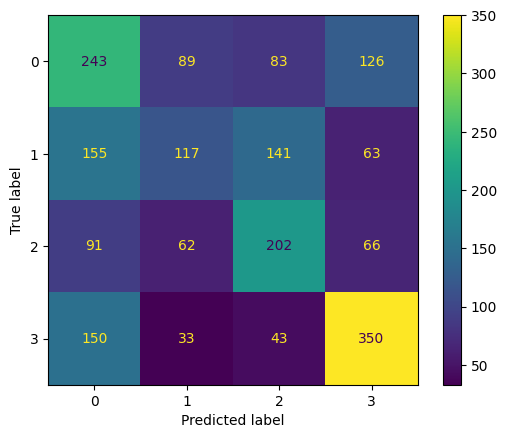

In [67]:
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [68]:
print(classification_report(y_test,ŷ_test))

              precision    recall  f1-score   support

           0       0.38      0.45      0.41       541
           1       0.39      0.25      0.30       476
           2       0.43      0.48      0.45       421
           3       0.58      0.61      0.59       576

    accuracy                           0.45      2014
   macro avg       0.44      0.45      0.44      2014
weighted avg       0.45      0.45      0.45      2014



### Decision Tree

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
estimator=DecisionTreeClassifier()
param_grid={'criterion':['gini','entropy']}
model=GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')
model.fit(x_train,y_train)
model.best_params_

{'criterion': 'gini'}

In [70]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini')
dt.fit(x_train,y_train)

train_pred=dt.predict(x_train)
test_pred=dt.predict(x_test)
#Evaluation
print('Train Accuracy:',accuracy_score(y_train,train_pred))
print('Test Accuracy:',accuracy_score(y_test,test_pred))

print('CV score:',cross_val_score(dt,x_train,y_train,cv=5,scoring='accuracy').mean())

Train Accuracy: 0.930327868852459
Test Accuracy: 0.3227408142999007
CV score: 0.3335807010035817


In [71]:
cm=confusion_matrix(y_test,ŷ_test)
cm

array([[243,  89,  83, 126],
       [155, 117, 141,  63],
       [ 91,  62, 202,  66],
       [150,  33,  43, 350]], dtype=int64)

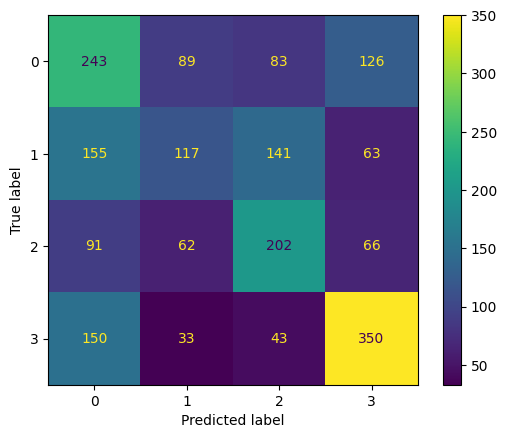

In [72]:
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [73]:
print(classification_report(y_test,ŷ_test))

              precision    recall  f1-score   support

           0       0.38      0.45      0.41       541
           1       0.39      0.25      0.30       476
           2       0.43      0.48      0.45       421
           3       0.58      0.61      0.59       576

    accuracy                           0.45      2014
   macro avg       0.44      0.45      0.44      2014
weighted avg       0.45      0.45      0.45      2014



### Random Forest

In [74]:
from  sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
estimator=RandomForestClassifier(random_state=42)
param_grid={"n_estimators":list(range(1,50))}
model=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
model.fit(x_train,y_train)
model.best_params_

{'n_estimators': 42}

In [75]:
rf=RandomForestClassifier(n_estimators=31)
rf.fit(x_train,y_train)

ŷ_train=rf.predict(x_train)
ŷ_test=rf.predict(x_test)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
print("train_accuracy",accuracy_score(y_train,ŷ_train))
print("test_accuracy",accuracy_score(y_test,ŷ_test))
print("CV",cross_val_score(rf,x_train,y_train,cv=5,scoring="accuracy").mean())

train_accuracy 0.9290859413810233
test_accuracy 0.36196623634558095
CV 0.3741922574227651


In [76]:
cm=confusion_matrix(y_test,ŷ_test)
cm

array([[189, 115,  99, 138],
       [117, 122, 150,  87],
       [ 96, 120, 135,  70],
       [159,  69,  65, 283]], dtype=int64)

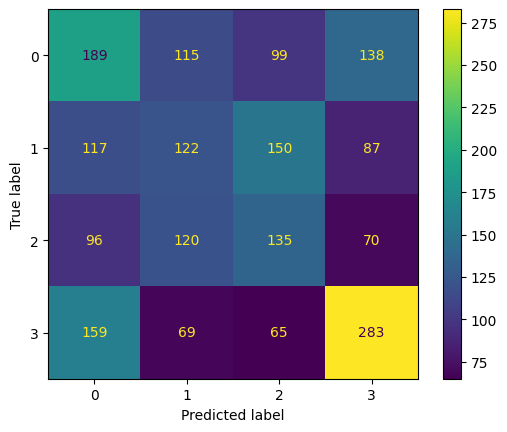

In [77]:
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [78]:
print(classification_report(y_test,ŷ_test))

              precision    recall  f1-score   support

           0       0.34      0.35      0.34       541
           1       0.29      0.26      0.27       476
           2       0.30      0.32      0.31       421
           3       0.49      0.49      0.49       576

    accuracy                           0.36      2014
   macro avg       0.35      0.35      0.35      2014
weighted avg       0.36      0.36      0.36      2014



### Adaboost Classifier

In [79]:
from  sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
estimator=AdaBoostClassifier(random_state=42)
param_grid={"n_estimators":list(range(1,50))}
model=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
model.fit(x_train,y_train)
model.best_params_

{'n_estimators': 48}

In [80]:
ab=AdaBoostClassifier(n_estimators=18)
ab.fit(x_train,y_train)

ŷ_train=ab.predict(x_train)
ŷ_test=ab.predict(x_test)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
print("train_accuracy",accuracy_score(y_train,ŷ_train))
print("test_accuracy",accuracy_score(y_test,ŷ_test))
print("CV",cross_val_score(ab,x_train,y_train,cv=5,scoring="accuracy").mean())

train_accuracy 0.45988574267262794
test_accuracy 0.4528301886792453
CV 0.4521864819120102


In [81]:
cm=confusion_matrix(y_test,ŷ_test)
cm

array([[232,  67, 118, 124],
       [137,  95, 177,  67],
       [ 76,  53, 225,  67],
       [133,  36,  47, 360]], dtype=int64)

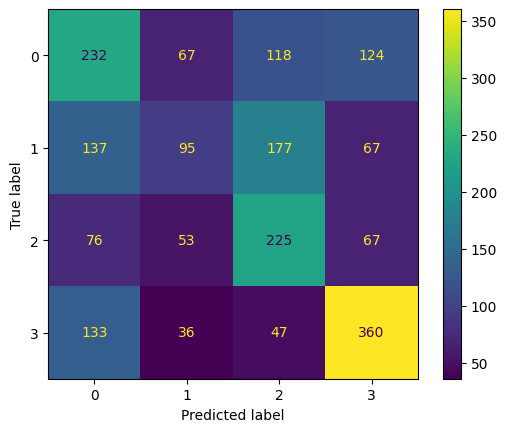

In [82]:
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [83]:
print(classification_report(y_test,ŷ_test))

              precision    recall  f1-score   support

           0       0.40      0.43      0.41       541
           1       0.38      0.20      0.26       476
           2       0.40      0.53      0.46       421
           3       0.58      0.62      0.60       576

    accuracy                           0.45      2014
   macro avg       0.44      0.45      0.43      2014
weighted avg       0.45      0.45      0.44      2014



### Gradient Boost Classifier

In [84]:
from  sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
estimator=GradientBoostingClassifier(random_state=42)
param_grid={"n_estimators":list(range(1,10)),"learning_rate":[0.1,0.2,0.3,0.4,0.5]}
model=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
model.fit(x_train,y_train)
model.best_params_

{'learning_rate': 0.3, 'n_estimators': 8}

In [85]:
gb=GradientBoostingClassifier(n_estimators=9,learning_rate=0.4)
gb.fit(x_train,y_train)

ŷ_train=gb.predict(x_train)
ŷ_test=gb.predict(x_test)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
print("train_accuracy",accuracy_score(y_train,ŷ_train))
print("test_accuracy",accuracy_score(y_test,ŷ_test))
print("CV",cross_val_score(gb,x_train,y_train,cv=5,scoring="accuracy").mean())

train_accuracy 0.48447590660705414
test_accuracy 0.4672293942403178
CV 0.46013571293629585


In [86]:
cm=confusion_matrix(y_test,ŷ_test)
cm

array([[260, 103,  62, 116],
       [149, 147, 114,  66],
       [ 82,  90, 181,  68],
       [147,  37,  39, 353]], dtype=int64)

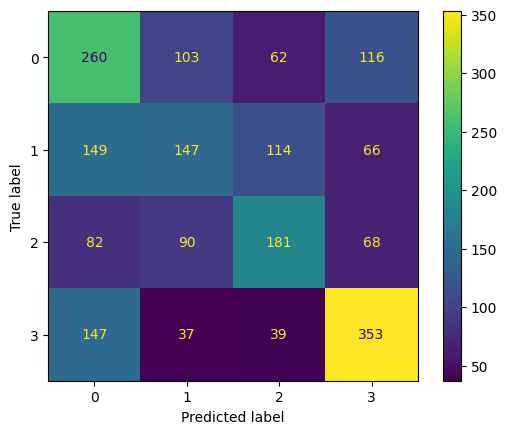

In [87]:
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [88]:
print(classification_report(y_test,ŷ_test))

              precision    recall  f1-score   support

           0       0.41      0.48      0.44       541
           1       0.39      0.31      0.34       476
           2       0.46      0.43      0.44       421
           3       0.59      0.61      0.60       576

    accuracy                           0.47      2014
   macro avg       0.46      0.46      0.46      2014
weighted avg       0.46      0.47      0.46      2014



### XG Boost Classifier

In [89]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
estimator=XGBClassifier(random_state=7)
param_grid={"n_estimators":[10,20,40,60],"Max_depth":[3,4,5],"gamma":[0,0.15,0.30,0.45,1]}
model=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
model.fit(x_train,y_train)
model.best_params_

{'Max_depth': 3, 'gamma': 1, 'n_estimators': 40}

In [90]:
xgb=XGBClassifier(max_depth=3,gamma=1,n_estimators=20)
xgb.fit(x_train,y_train)

ŷ_train=xgb.predict(x_train)
ŷ_test=xgb.predict(x_test)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
print("train_accuracy",accuracy_score(y_train,ŷ_train))
print("test_accuracy",accuracy_score(y_test,ŷ_test))
print("CV",cross_val_score(xgb,x_train,y_train,cv=5,scoring="accuracy").mean())

train_accuracy 0.4860904123199205
test_accuracy 0.4637537239324727
CV 0.46336460128541734


In [91]:
cm=confusion_matrix(y_test,ŷ_test)
cm

array([[251,  96,  70, 124],
       [152, 134, 120,  70],
       [ 83,  81, 189,  68],
       [137,  40,  39, 360]], dtype=int64)

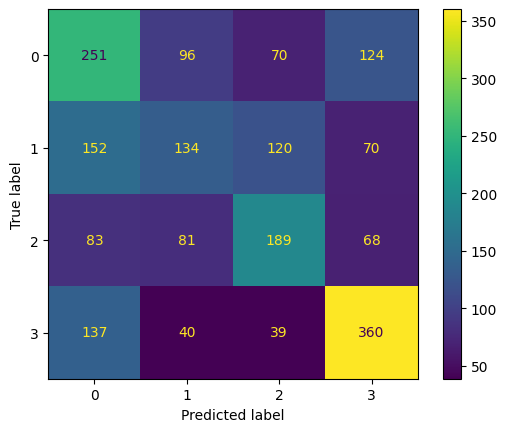

In [92]:
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [93]:
print(classification_report(y_test,ŷ_test))

              precision    recall  f1-score   support

           0       0.40      0.46      0.43       541
           1       0.38      0.28      0.32       476
           2       0.45      0.45      0.45       421
           3       0.58      0.62      0.60       576

    accuracy                           0.46      2014
   macro avg       0.45      0.45      0.45      2014
weighted avg       0.46      0.46      0.46      2014

